In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

In [2]:
class Perceptron:
    def __init__(self, eta, epochs, activationFunction):
        self.weights = np.random.randn(3) * 1e-4
        print(f"self.weights: {self.weights}")
        self.eta = eta
        self.epochs = epochs
        self.activationFunction = activationFunction

    def fit(self, X, y):
        self.X = X
        self.y = y

        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
        print(f"X_with_bias: \n{X_with_bias}")

        for epoch in range(self.epochs):
            print(f"for epoch: {epoch}")
            y_hat = self.activationFunction(X_with_bias, self.weights)
            print(f"predicted value: \n{y_hat}")
            error = self.y - y_hat
            print(f"error: \n{error}")
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print(f"updated weights: \n{self.weights}")
            print("#############\n")

    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
        return self.activationFunction(X_with_bias, self.weights)

In [3]:
activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0 , 1, 0)

# AND

In [4]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X = AND.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [6]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [7]:
model = Perceptron(eta = 0.5, epochs=10, activationFunction=activationFunction)

self.weights: [ 1.00888886e-05 -4.33311785e-05  1.02665041e-04]


In [8]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 0.50001009  0.49995667 -0.49989733]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00888886e-05 -4.33311785e-05  1.00010267e+00]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.50001009 0.49995667 0.50010267]
#############

for epoch: 3
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.50001009 0.49995667 0.50010267]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.50001009 0.49995667 0.50010267]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3 

In [9]:
model.predict(X)

array([0, 0, 0, 1])

# OR

In [10]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [11]:
X = OR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [12]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [13]:
model = Perceptron(eta = 0.5, epochs=10, activationFunction=activationFunction)

self.weights: [-3.54912179e-05  1.38069688e-04  6.40895877e-05]


In [14]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 1]
error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99964509e-01  1.38069688e-04 -4.99935910e-01]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[4.99964509e-01 1.38069688e-04 6.40895877e-05]
#############

for epoch: 2
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[4.99964509e-01 1.38069688e-04 6.40895877e-05]
#############

for epoch: 3
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[4.99964509e-01 1.38069688e-04 6.40895877e-05]
#############

for epoch: 4
predicted value: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[4.99964509e-01 1.38069688e-04 6.40895877e-05]
#############

for epoch: 5
predicted valu

# XOR

In [15]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [16]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [17]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [18]:
model = Perceptron(eta = 0.5, epochs=50, activationFunction=activationFunction)

self.weights: [ 4.53990361e-05  6.75331773e-05 -1.28979439e-04]


In [19]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.4999546  -0.49993247  0.99987102]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.53990361e-05  6.75331773e-05 -1.28979439e-04]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.4999546  -0.49993247  0.99987102]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.53990361e-05  6.75331773e-05 -1.28979439e-04]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.4999546  -0.49993247  0.99987102]
#############

for epoch: 5
predicted value: 
[0 0 0 0]
error: 
0 

In [20]:
model.predict(X) # Doesn't predict since its a non-linear problem

array([1, 1, 1, 1])

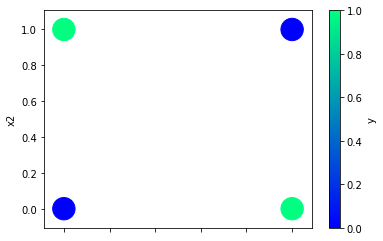

In [21]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")

In [22]:
# Cannot segregate since non-linear data
# Hence MLPs are used